In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#data_sin=pd.read_csv('../../Data/Cleaned/bbank_full_limpio_v0_sindefault.csv')
#data_sin.head()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank_full_limpio_v0_sindefault.csv to bank_full_limpio_v0_sindefault.csv


In [4]:
data_sin=pd.read_csv('bank_full_limpio_v0_sindefault.csv')
data_sin.head()

,age,job,marital,education,balance,housing,loan,car,contact,day,month,duration,campaign,previous,poutcome,subscribed,dia_semana
0,58,0.139,0.102,0.151,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
1,44,0.111,0.151,0.107,0.082,0.078,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122
2,33,0.083,0.102,0.107,0.082,0.078,0.067,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
3,47,0.074,0.102,0.135,0.165,0.078,0.128,0.102,0.041,5,0.068,0.119,1,0,0.093,0,0.122
4,33,0.115,0.151,0.135,0.082,0.168,0.128,0.151,0.041,5,0.068,0.119,1,0,0.093,0,0.122


In [5]:
X=data_sin.drop('subscribed',axis=1)
y=data_sin['subscribed']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0,shuffle=True)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo 1

In [7]:
from keras.models import Sequential
from keras.layers import Dense

# Crear el modelo
model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria

# Compilar el modelo
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model1.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
895/895 [==============================] - 2s 2ms/step - loss: 0.3156 - accuracy: 0.8891 - val_loss: 0.2962 - val_accuracy: 0.8913
Epoch 2/100
895/895 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.8910 - val_loss: 0.2932 - val_accuracy: 0.8910
Epoch 3/100
895/895 [==============================] - 1s 2ms/step - loss: 0.2978 - accuracy: 0.8924 - val_loss: 0.2909 - val_accuracy: 0.8941
Epoch 4/100
895/895 [==============================] - 2s 2ms/step - loss: 0.2963 - accuracy: 0.8928 - val_loss: 0.2900 - val_accuracy: 0.8922
Epoch 5/100
895/895 [==============================] - 2s 2ms/step - loss: 0.2947 - accuracy: 0.8924 - val_loss: 0.2876 - val_accuracy: 0.8942
Epoch 6/100
895/895 [==============================] - 1s 2ms/step - loss: 0.2938 - accuracy: 0.8937 - val_loss: 0.2894 - val_accuracy: 0.8941
Epoch 7/100
895/895 [==============================] - 1s 2ms/step - loss: 0.2921 - accuracy: 0.8943 - val_loss: 0.2879 - val_accuracy: 0.8957

In [9]:
loss, accuracy = model1.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

280/280 [==============================] - 0s 1ms/step - loss: 0.3391 - accuracy: 0.8829
Accuracy: 88.29%


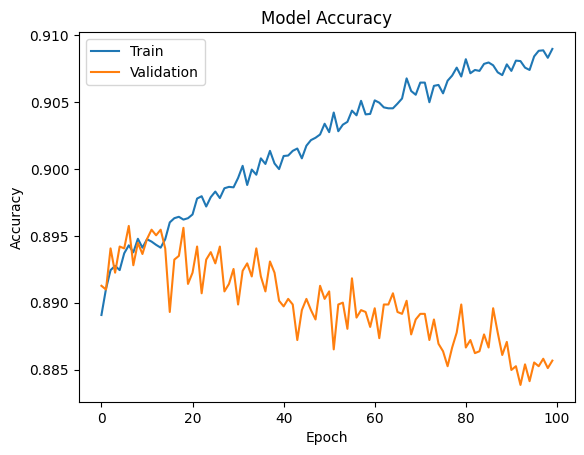

In [10]:
import matplotlib.pyplot as plt

# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Precisión en Entrenamiento: La línea azul, que representa la precisión en el conjunto de entrenamiento, muestra un aumento constante a lo largo de las épocas, lo cual indica que el modelo está aprendiendo efectivamente de los datos de entrenamiento. Esto es positivo ya que sugiere una buena capacidad del modelo para adaptarse a los datos.


Precisión en Validación: La línea naranja, que muestra la precisión en el conjunto de validación, es bastante volátil y generalmente más baja que la precisión del conjunto de entrenamiento. Esto podría indicar un problema de sobreajuste, donde el modelo aprende detalles específicos del conjunto de entrenamiento que no generalizan bien al conjunto de validación.

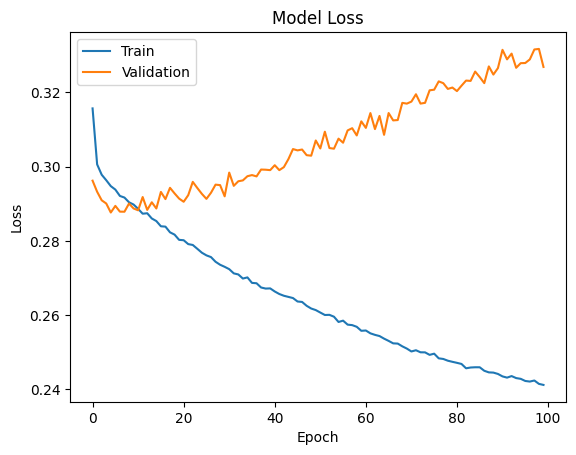

In [11]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Pérdida en Entrenamiento: La línea azul indica que la pérdida en el conjunto de entrenamiento disminuye de manera constante, lo cual es un signo de que el modelo está aprendiendo adecuadamente de los datos de entrenamiento.

Pérdida en Validación: La línea naranja muestra un incremento constante en la pérdida del conjunto de validación a partir de aproximadamente la época 20, lo que sugiere que el modelo comienza a desempeñarse peor en los datos de validación conforme avanza el entrenamiento. Esto es un claro indicativo de sobreajuste.

# Modelo 2

In [12]:
from keras.layers import Dropout
from keras.regularizers import l2

# Crear el modelo con regularización L2 y Dropout
model2 = Sequential()
model2.add(Dense(64, input_shape=(X_train_scaled.shape[1],), activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

In [13]:
from keras.optimizers import Adam

# Configurar el optimizador con una tasa de aprendizaje personalizada
optimizer = Adam(learning_rate=0.0001)  # Reducir la tasa de aprendizaje

In [14]:
model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Entrenar el modelo con un tamaño de lote diferente
history = model2.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
448/448 [==============================] - 2s 2ms/step - loss: 1.1579 - accuracy: 0.7892 - val_loss: 0.9671 - val_accuracy: 0.8841
Epoch 2/100
448/448 [==============================] - 1s 2ms/step - loss: 0.9206 - accuracy: 0.8721 - val_loss: 0.7858 - val_accuracy: 0.8841
Epoch 3/100
448/448 [==============================] - 1s 2ms/step - loss: 0.7726 - accuracy: 0.8797 - val_loss: 0.6656 - val_accuracy: 0.8844
Epoch 4/100
448/448 [==============================] - 1s 2ms/step - loss: 0.6632 - accuracy: 0.8821 - val_loss: 0.5786 - val_accuracy: 0.8878
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 0.5855 - accuracy: 0.8829 - val_loss: 0.5142 - val_accuracy: 0.8901
Epoch 6/100
448/448 [==============================] - 1s 2ms/step - loss: 0.5231 - accuracy: 0.8851 - val_loss: 0.4658 - val_accuracy: 0.8924
Epoch 7/100
448/448 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.8858 - val_loss: 0.4292 - val_accuracy: 0.8946

In [16]:
loss, accuracy = model2.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

280/280 [==============================] - 0s 1ms/step - loss: 0.3118 - accuracy: 0.8928
Accuracy: 89.28%


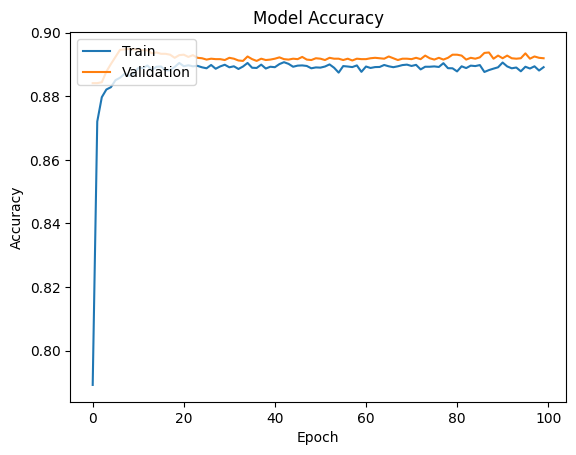

In [17]:
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La precisión tanto en el entrenamiento como en la validación es bastante estable y cercana entre sí, lo cual es un buen indicativo de que el modelo generaliza bien. Este es un cambio positivo en comparación con el primer modelo, donde había una variabilidad significativa en la precisión de validación.

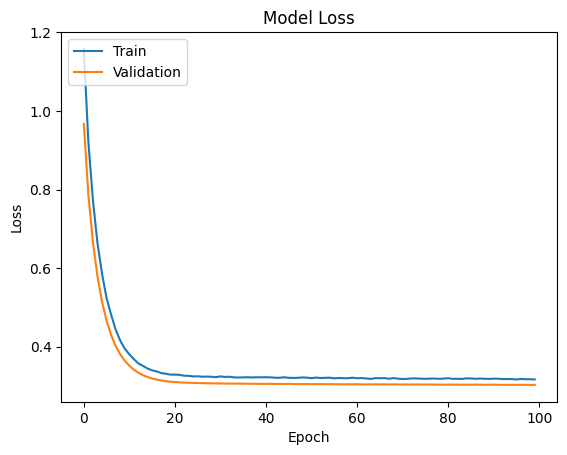

In [18]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La pérdida en ambos, entrenamiento y validación, disminuye rápidamente y luego se estabiliza, manteniendo valores muy cercanos a lo largo de las épocas restantes. Esto sugiere que el modelo no está sobreajustando, como era el caso en el primer modelo, donde la pérdida de validación comenzó a aumentar después de un tiempo.

# Hyper Modelo

In [19]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


In [20]:
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch
from keras.layers import Dropout, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2

class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model = Sequential()
        model.add(Dense(
            units=hp.Int('units', 32, 128, step=32, default=64),
            activation='relu',
            input_shape=(self.input_shape,),
            kernel_regularizer=l2(hp.Float('l2', 1e-4, 1e-2, sampling='log'))))
        model.add(Dropout(hp.Float('dropout_1', 0.3, 0.7, step=0.1, default=0.5)))
        for i in range(hp.Int('layers', 1, 3)):
            model.add(Dense(
                units=hp.Int(f'units_{i}', 32, 128, step=32),
                activation='relu',
                kernel_regularizer=l2(hp.Float(f'l2_{i}', 1e-4, 1e-2, sampling='log'))))
            model.add(Dropout(hp.Float(f'dropout_{i+1}', 0.3, 0.7, step=0.1)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(
            optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss='binary_crossentropy',
            metrics=['accuracy'])
        return model

# Crear una instancia del modelo hypermodel
hypermodel = MyHyperModel(input_shape=X_train_scaled.shape[1])

# Configurar el tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='keras_tuner_demo')

# Iniciar la búsqueda
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Trial 20 Complete [00h 08m 01s]
val_loss: 0.29452507197856903

Best val_loss So Far: 0.29334667325019836
Total elapsed time: 02h 33m 06s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 320

## Entrenamiento Final del Modelo

In [21]:
# Configuración del modelo con los mejores hiperparámetros
final_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compilando el modelo final
final_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo en el conjunto de datos completo (entrenamiento + validación)
#X_full_scaled = np.vstack((X_train_scaled, X_test_scaled))  # Combina train y validation sets para el entrenamiento final
#y_full = np.hstack((y_train, y_test))

#final_model.fit(X_full_scaled, y_full, epochs=100, batch_size=64, verbose=1)
history = final_model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
448/448 [==============================] - 2s 3ms/step - loss: 1.5076 - accuracy: 0.7812 - val_loss: 1.1860 - val_accuracy: 0.8841
Epoch 2/100
448/448 [==============================] - 1s 3ms/step - loss: 1.0682 - accuracy: 0.8813 - val_loss: 0.8928 - val_accuracy: 0.8883
Epoch 3/100
448/448 [==============================] - 1s 3ms/step - loss: 0.8240 - accuracy: 0.8838 - val_loss: 0.6997 - val_accuracy: 0.8918
Epoch 4/100
448/448 [==============================] - 2s 4ms/step - loss: 0.6601 - accuracy: 0.8854 - val_loss: 0.5707 - val_accuracy: 0.8935
Epoch 5/100
448/448 [==============================] - 2s 4ms/step - loss: 0.5487 - accuracy: 0.8881 - val_loss: 0.4849 - val_accuracy: 0.8946
Epoch 6/100
448/448 [==============================] - 3s 8ms/step - loss: 0.4770 - accuracy: 0.8882 - val_loss: 0.4279 - val_accuracy: 0.8943
Epoch 7/100
448/448 [==============================] - 2s 5ms/step - loss: 0.4270 - accuracy: 0.8893 - val_loss: 0.3900 - val_accuracy: 0.8946

##  Evaluación del Modelo

In [ ]:
# Suponiendo que tienes un conjunto de test separado que no fue utilizado
loss, accuracy = final_model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Loss: {loss}')

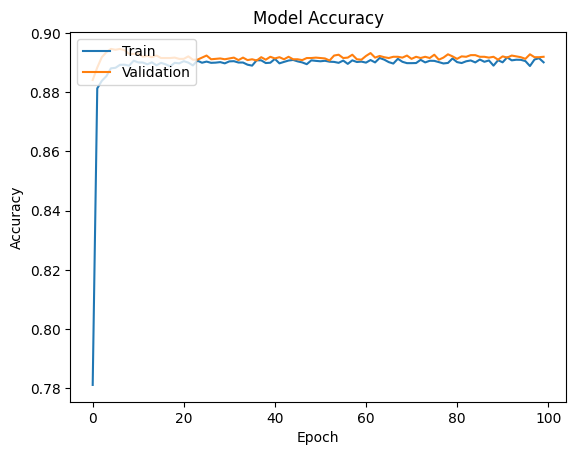

In [23]:
# Sumarizar el historial para la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La precisión del modelo en el conjunto de entrenamiento y validación es bastante alta y estable, con la línea de validación siguiendo de cerca a la línea de entrenamiento, lo que indica un buen equilibrio y que el modelo generaliza bien.

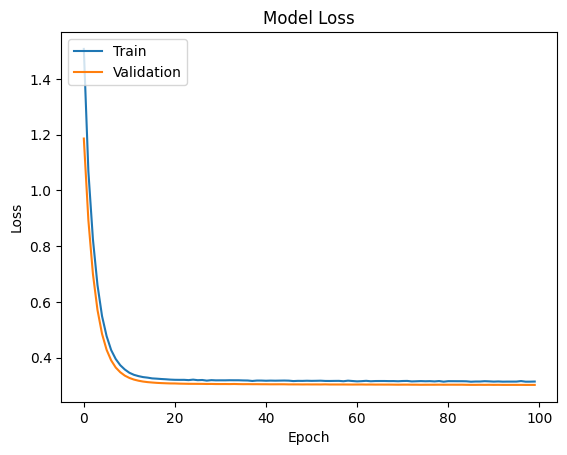

In [24]:
# Sumarizar el historial para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

La pérdida en ambos conjuntos disminuye de manera constante y se estabiliza, lo cual es un indicativo positivo de que el modelo está aprendiendo adecuadamente sin sobreajustarse significativamente.

In [25]:
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Realizar predicciones probabilísticas con el modelo
y_pred_prob = final_model.predict(X_test_scaled).ravel()  # Obtener probabilidades
y_pred = (y_pred_prob > 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

# Calcular las métricas de clasificación
print(classification_report(y_test, y_pred))

280/280 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7907
           1       0.57      0.20      0.30      1036

    accuracy                           0.89      8943
   macro avg       0.74      0.59      0.62      8943
weighted avg       0.86      0.89      0.87      8943



In [26]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Asegúrate de que los datos son arrays de NumPy directamente
X = np.array(X_train_scaled)
y = np.array(y_train)

def create_model(l2_rate, learning_rate):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=l2(l2_rate)),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Configuración de la validación cruzada
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Ejecutar la validación cruzada
auc_scores = []
for train_index, test_index in skf.split(X, y):
    X_train_fold = X[train_index]
    X_test_fold = X[test_index]
    y_train_fold = y[train_index]
    y_test_fold = y[test_index]

    model = create_model(0.01, 0.0001)  # Ajusta los hiperparámetros según tu optimización
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=64, verbose=1)

    # Evaluación del modelo en el conjunto de prueba del pliegue actual
    y_pred_prob = model.predict(X_test_fold).ravel()
    roc_auc = roc_auc_score(y_test_fold, y_pred_prob)
    auc_scores.append(roc_auc)

# Imprimir el rendimiento promedio en todos los pliegues
print(f'Mean ROC AUC Score across all folds: {np.mean(auc_scores)}')

Epoch 1/100
448/448 [==============================] - 1s 2ms/step - loss: 1.5349 - accuracy: 0.7613
Epoch 2/100
448/448 [==============================] - 1s 2ms/step - loss: 1.0919 - accuracy: 0.8805
Epoch 3/100
448/448 [==============================] - 1s 2ms/step - loss: 0.8452 - accuracy: 0.8852
Epoch 4/100
448/448 [==============================] - 1s 2ms/step - loss: 0.6814 - accuracy: 0.8870
Epoch 5/100
448/448 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.8870
Epoch 6/100
448/448 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.8892
Epoch 7/100
448/448 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8890
Epoch 8/100
448/448 [==============================] - 2s 3ms/step - loss: 0.4028 - accuracy: 0.8887
Epoch 9/100
448/448 [==============================] - 1s 3ms/step - loss: 0.3782 - accuracy: 0.8902
Epoch 10/100
448/448 [==============================] - 1s 2ms/step - loss: 0.3621 - accura

Los registros de entrenamiento muestran que el modelo alcanza consistentemente una precisión aproximada de 88-89% en cada fold. Esto sugiere que el modelo es estable y produce resultados consistentes a través de diferentes muestras de datos.

La pérdida (loss) disminuye con cada época de entrenamiento, lo que indica que el modelo está aprendiendo efectivamente de los datos en cada fold. La pérdida comienza más alta en la primera época y luego se reduce significativamente, estabilizándose hacia las últimas épocas.

El valor medio del ROC AUC Score es de aproximadamente 0.775. El AUC (Area Under the Curve) mide la capacidad del modelo para discriminar entre las clases positivas y negativas. Un AUC de 0.775 indica una buena capacidad predictiva, aunque podría haber margen para mejorar.